**Purpose**: Analyze the Google Analytics stats of Galaxy Training Material website

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import datetime
from dateutil import relativedelta

Usage: on Google Analytics

1. Export Audience (Audience - Overview) per month from Nov 1, 2018 to today for all pages to csv in `data/audience_statistics.csv`
2. Export Page statistics (Behaviour - Site Content - All pages) from Nov 1, 2018 to today for all pages to csv in `data/page_statistics.csv`

In [2]:
start = datetime.datetime(year=2018, month=11, day=1)
end = datetime.datetime.now()
str(end)

'2020-09-28 13:17:49.298397'

In [3]:
r = relativedelta.relativedelta(end, start)
month_nb = 12*r.years + r.months
month_nb

22

# General statistics

In [11]:
df = (pd.read_csv('../data/audience_statistics.csv', header=5)
     .dropna())
# format columns
df["Month Index"] = df["Month Index"].astype(int)
df["Users"] = df["Users"].str.replace(',', '').astype(int)
# add column with date
df["Month"] = [start + relativedelta.relativedelta(months=i) for i in df["Month Index"]]
# put month as index
df = (df
      .set_index('Month')
      .drop(["Month Index"], axis=1))

In [12]:
df

,Users
Month,
2018-11-01,6175
2018-12-01,5933
2019-01-01,6507
2019-02-01,7402
2019-03-01,9850
2019-04-01,10985
2019-05-01,12012
2019-06-01,10115
2019-07-01,11101


In [13]:
df.Users.mean()

15570.130434782608

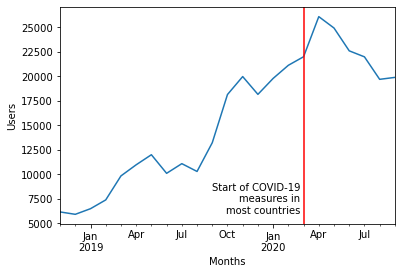

In [30]:
plt.figure()
df.Users.plot()
plt.xlabel('Months')
plt.ylabel('Users')
plt.axvline('2020-03-01', color='red')
plt.text('2020-03-01', 6000, 'Start of COVID-19 \nmeasures in \nmost countries ', horizontalalignment='right')
plt.show()

# Page statistics

In [8]:
df = (pd.read_csv('../data/page_statistics.csv', header=5, skipfooter=1)
     .dropna()
     .drop(['Page Value'], axis=1))
# keep only lines for tutorials
df = df[df.Page.str.contains('tutorials')]
df = df[~df.Page.str.contains('translate')]
# extract topics and tutorial
new = df.Page.str.split('/', expand = True)
df["Tutorial"] = new[5]
df["Topic"] = new[3]
df = (df.drop(columns =["Page"]))
# add page view per month
df.Pageviews = df.Pageviews.str.replace(',', '').astype(int)
df["Pageviews / month"] = round(df.Pageviews / month_nb)
# format columns
df["Unique Pageviews"] = df["Unique Pageviews"].str.replace(',', '').astype(int)
df["Entrances"] = df["Entrances"].str.replace(',', '').astype(int)
# order columns
df = df.reindex(columns=[
    'Tutorial', 'Topic', 'Pageviews / month', 'Pageviews', 'Unique Pageviews', 'Avg. Time on Page', 'Entrances', 'Bounce Rate', '% Exit'])
df

/Users/bebatut/miniconda3/envs/gtn-community-paper-2020/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,Tutorial,Topic,Pageviews / month,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit
2,rna-seq-viz-with-volcanoplot,transcriptomics,2240.0,49284,42644,00:04:26,40669,84.14%,79.53%
3,ref-based,transcriptomics,2174.0,47829,40044,00:04:49,32487,77.98%,71.07%
5,quality-control,sequence-analysis,1550.0,34095,29193,00:04:40,21809,81.27%,69.54%
6,mothur-miseq-sop,metagenomics,1508.0,33167,27516,00:05:00,23578,79.70%,73.42%
8,rna-seq-viz-with-heatmap2,transcriptomics,1267.0,27880,24606,00:04:17,22355,83.32%,77.89%
9,rna-seq-reads-to-counts,transcriptomics,1008.0,22178,19422,00:04:08,15146,78.69%,68.99%


In [9]:
df[['Tutorial', 'Topic', 'Pageviews / month']].head(10)

,Tutorial,Topic,Pageviews / month
2,rna-seq-viz-with-volcanoplot,transcriptomics,2240.0
3,ref-based,transcriptomics,2174.0
5,quality-control,sequence-analysis,1550.0
6,mothur-miseq-sop,metagenomics,1508.0
8,rna-seq-viz-with-heatmap2,transcriptomics,1267.0
9,rna-seq-reads-to-counts,transcriptomics,1008.0
